<a href="https://colab.research.google.com/github/EvgenyEsin/Machine_learning/blob/main/Machine_learning_sem_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Работа с данными. Домашнее задание


## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean
from sklearn.model_selection import train_test_split

In [2]:
### YOUR CODE HERE ###
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Genre                   181 non-null    object 
 2   Age                     180 non-null    float64
 3   Annual Income (k$)      180 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

In [4]:
### YOUR CODE HERE ###
# пропуски
df.isna().sum()

,0
CustomerID,0
Genre,19
Age,20
Annual Income (k$),20
Spending Score (1-100),0


In [5]:
# РАСПРЕДЕЛЕНИЕ ПРИЗНАКОВ
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,180.000000,180.000000,200.000000
mean,100.500000,39.894444,5615.433333,50.200000
std,57.879185,16.842848,74531.115872,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,29.000000,42.000000,34.750000
50%,100.500000,36.000000,61.000000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,135.000000,1000000.000000,99.000000


In [6]:
df[df.duplicated()]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)


дубликатов нет

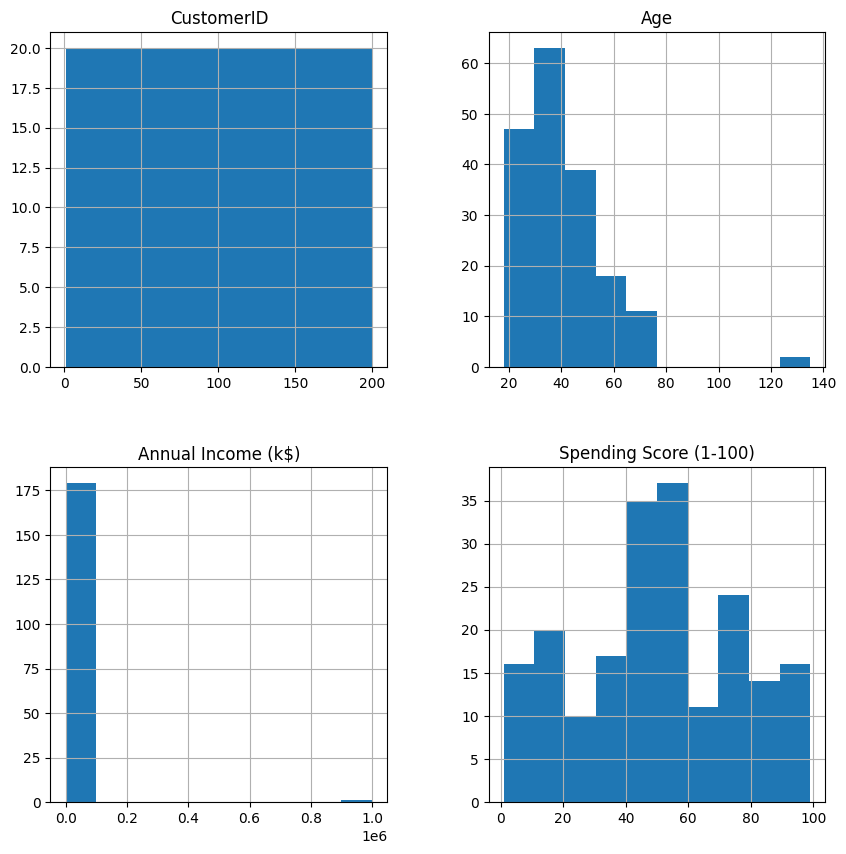

In [7]:
df.hist(figsize=(10, 10));

Возможны выбросы в Annual Income и аномалии в Age (возраст не может быть 135 лет)

### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [8]:
X = df.drop(["Spending Score (1-100)"], axis=1)
y = df["Spending Score (1-100)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

In [ ]:
### YOUR CODE HERE ###

Заменяем строковые переменные на числовые в обучающей выборке

In [9]:
X_train["Genre"].value_counts()

,count
Genre,
Female,77
Male,67
Feemale,1


In [10]:
X_train["Genre"].replace("Male", 1, inplace = True)
X_train["Genre"].replace("Female", 0, inplace = True)
X_train["Genre"].replace("Feemale", 0, inplace = True)

<ipython-input-10-7f89537a9c8f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train["Genre"].replace("Male", 1, inplace = True)
<ipython-input-10-7f89537a9c8f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 108 to 37
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          160 non-null    int64  
 1   Genre               145 non-null    float64
 2   Age                 145 non-null    float64
 3   Annual Income (k$)  142 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 6.2 KB


In [12]:
X_train["Genre"].value_counts()

,count
Genre,
0.0,78
1.0,67


Теперь нам нужно заменить пустые значения в Age и Annual Income (k$) на медиану столбца, и удалить пустые строки
 Genre

In [13]:
X_train.isna().sum()

,0
CustomerID,0
Genre,15
Age,15
Annual Income (k$),18


In [14]:
X_train["Age"].fillna(X_train["Age"].median(), inplace = True)
X_train["Annual Income (k$)"].fillna(X_train["Annual Income (k$)"].median(), inplace = True)

<ipython-input-14-50a20b0f3d40>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train["Age"].fillna(X_train["Age"].median(), inplace = True)
<ipython-input-14-50a20b0f3d40>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [15]:
# Удаление строк с пропущенными значениями в Genre
X_train = X_train.dropna(subset=['Genre'])

In [16]:
X_train["Genre"] = X_train["Genre"].astype("int64")
X_train["Age"] = X_train["Age"].astype("int64")
#Приобразуем столбец в тип данных int64

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 108 to 37
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          145 non-null    int64  
 1   Genre               145 non-null    int64  
 2   Age                 145 non-null    int64  
 3   Annual Income (k$)  145 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.7 KB


### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


In [ ]:
### YOUR CODE HERE ###


<Axes: >

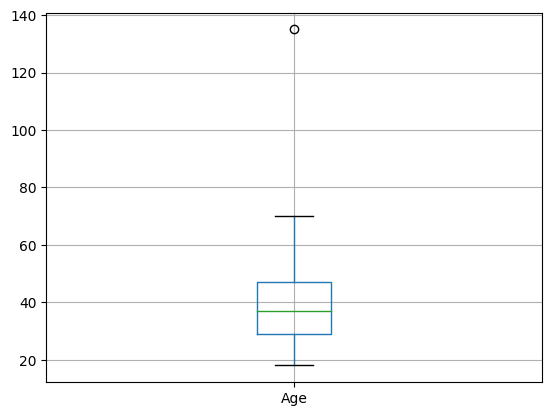

In [18]:
X_train.boxplot("Age") # строим ящик с усами и видим, что есть аномалия

<Axes: >

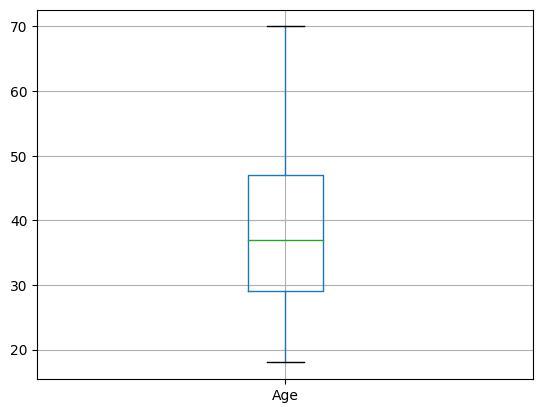

In [19]:
X_train = X_train[X_train["Age"] < 100] # удилим из данным строки, где Age больше 100 (столько не живут)
X_train.boxplot("Age")

Больше аномалий нет.

<Axes: >

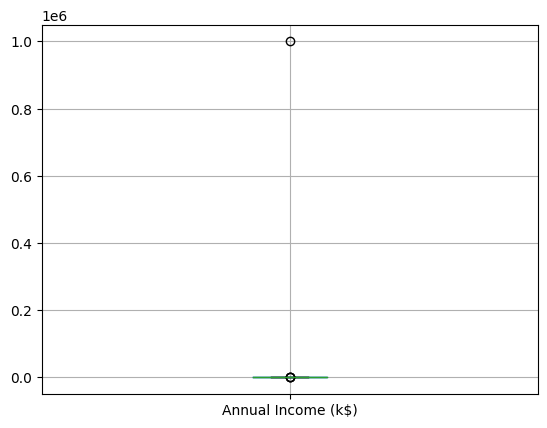

In [20]:
X_train.boxplot("Annual Income (k$)") # строим ящик с усами и видим, что есть выбросы

<Axes: >

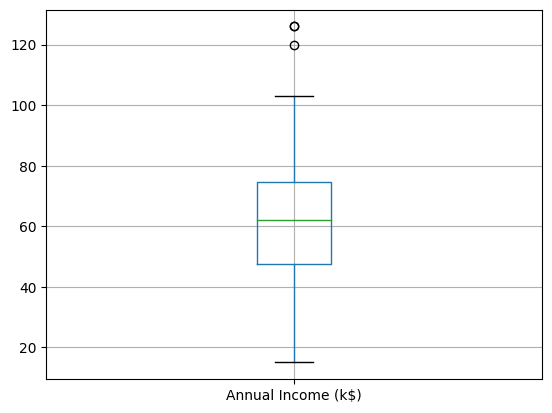

In [21]:
X_train = X_train[X_train["Annual Income (k$)"] < 200000] # удилим из данным строки, где Annual Income больше 200000
X_train.boxplot("Annual Income (k$)")

### Задание 6

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.


In [ ]:
### YOUR CODE HERE ###


Нормализация численных признаков

In [22]:
from sklearn import preprocessing

In [23]:
min_max_Scaler = preprocessing.MinMaxScaler()
col = X_train.columns
result = min_max_Scaler.fit_transform(X_train)
X_train = pd.DataFrame(result, columns = col)

In [24]:
X_train.describe()

,CustomerID,Genre,Age,Annual Income (k$)
count,143.000000,143.000000,143.000000,143.000000
mean,0.509389,0.454545,0.385422,0.405216
std,0.284201,0.499680,0.252765,0.208185
min,0.000000,0.000000,0.000000,0.000000
25%,0.291878,0.000000,0.211538,0.292793
50%,0.522843,0.000000,0.365385,0.423423
75%,0.738579,1.000000,0.557692,0.536036
max,1.000000,1.000000,1.000000,1.000000


### Задание 7

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

In [ ]:
### YOUR CODE HERE ###


См. выше в задании 4.

### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

In [ ]:
### YOUR CODE HERE ###


См. выше в задании 4.